

Implementation of LSTM Model on EUR-JPU prediction of the close price 6， 12， and 24 hours ahead based on data of previous 72 hours

## 1. Data Preparation

### 1.1 Read in data file

In [1]:
import talib as ta

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler

from utils import series_to_supervised

In [2]:
data = pd.read_csv('../data/EUR_JPY_H1.csv')
data

,datetime,open,high,low,close
0,2005-01-02T18:00:00.000000000Z,139.100,139.110,139.050,139.050
1,2005-01-02T19:00:00.000000000Z,139.160,139.300,139.090,139.200
2,2005-01-02T20:00:00.000000000Z,139.200,139.250,139.030,139.120
3,2005-01-02T21:00:00.000000000Z,139.110,139.280,139.110,139.170
4,2005-01-02T22:00:00.000000000Z,139.160,139.220,139.110,139.190
...,...,...,...,...,...
103072,2021-02-26T18:00:00.000000000Z,128.826,128.826,128.738,128.758
103073,2021-02-26T19:00:00.000000000Z,128.762,128.822,128.676,128.782
103074,2021-02-26T20:00:00.000000000Z,128.784,128.792,128.594,128.594
103075,2021-02-26T21:00:00.000000000Z,128.598,128.680,128.563,128.655


### 1.2 Datetime formatting

In [3]:
data['datetime'] = pd.to_datetime(data['datetime'])
data['datetime'] = data['datetime'].dt.tz_localize(None)
# data.set_index('datetime', inplace=True)
data

,datetime,open,high,low,close
0,2005-01-02 18:00:00,139.100,139.110,139.050,139.050
1,2005-01-02 19:00:00,139.160,139.300,139.090,139.200
2,2005-01-02 20:00:00,139.200,139.250,139.030,139.120
3,2005-01-02 21:00:00,139.110,139.280,139.110,139.170
4,2005-01-02 22:00:00,139.160,139.220,139.110,139.190
...,...,...,...,...,...
103072,2021-02-26 18:00:00,128.826,128.826,128.738,128.758
103073,2021-02-26 19:00:00,128.762,128.822,128.676,128.782
103074,2021-02-26 20:00:00,128.784,128.792,128.594,128.594
103075,2021-02-26 21:00:00,128.598,128.680,128.563,128.655


### 1.3 TA indicators

In [4]:
open_ = data['open'].values
high_ = data['high'].values
low_ = data['low'].values
close_ = data['close'].values
dt = data.index

In [5]:
## overlap studies indicators
# BBANDS - Bollinger Bands
data['upperband'] = ta.BBANDS(close_, timeperiod=24, nbdevup=2, nbdevdn=2, matype=0)[0]
data['middleband'] = ta.BBANDS(close_, timeperiod=24, nbdevup=2, nbdevdn=2, matype=0)[1]
data['lowerband'] = ta.BBANDS(close_, timeperiod=24, nbdevup=2, nbdevdn=2, matype=0)[2]
# DEMA - Double Exponential Moving Average
data['dema'] = ta.DEMA(close_, timeperiod=24)
# EMA - Exponential Moving Average
data['ema'] = ta.EMA(close_, timeperiod=24)
# HT_TRENDLINE - Hilbert Transform - Instantaneous Trendline
data['ht'] = ta.HT_TRENDLINE(close_)
# KAMA - Kaufman Adaptive Moving Average
data['kama'] = ta.KAMA(close_, timeperiod=30)
# MA - Moving average
data['ma'] = ta.MA(close_, timeperiod=24, matype=0)
# # MAMA - MESA Adaptive Moving Average
# data['mama'] = ta.MAMA(close_, fastlimit=0, slowlimit=0)[0]
# data['fama'] = ta.MAMA(close_, fastlimit=0, slowlimit=0)[1]
# MAVP - Moving average with variable period
# data['mavp'] = ta.MAVP(close_, periods, minperiod=2, maxperiod=30, matype=0)
# MIDPOINT - MidPoint over period
data['midpoint'] = ta.MIDPOINT(close_, timeperiod=24)
# MIDPRICE - Midpoint Price over period
data['midprice'] = ta.MIDPRICE(high_, low_, timeperiod=24)
# SAR - Parabolic SAR
data['sar'] = ta.SAR(high_, low_, acceleration=0, maximum=0)
# SAREXT - Parabolic SAR - Extended
data['sarext'] = ta.SAREXT(high_, low_, startvalue=0, offsetonreverse=0, accelerationinitlong=0, accelerationlong=0, accelerationmaxlong=0, accelerationinitshort=0, accelerationshort=0, accelerationmaxshort=0)
# SMA - Simple Moving Average
data['sma24'] = ta.SMA(close_, timeperiod=24)
data['sma48'] = ta.SMA(close_, timeperiod=48)
# T3 - Triple Exponential Moving Average (T3)
data['t3'] = ta.T3(close_, timeperiod=24, vfactor=0)
# TEMA - Triple Exponential Moving Average
data['tema'] = ta.TEMA(close_, timeperiod=24)
# TRIMA - Triangular Moving Average
data['trima'] = ta.TRIMA(close_, timeperiod=24)
# WMA - Weighted Moving Average
data['wma'] = ta.WMA(close_, timeperiod=24)
data['wma'] = ta.WMA(close_, timeperiod=48)

In [6]:
## Momentum indicators
# ADX - Average Directional Movement Index
data['adx'] = ta.ADX(high_, low_, close_, timeperiod=24)
# ADXR - Average Directional Movement Index Rating
data['adxr'] = ta.ADXR(high_, low_, close_, timeperiod=24)
# APO - Absolute Price Oscillator
data['apo'] = ta.APO(close_, fastperiod=12, slowperiod=24, matype=0)
# AROON - Aroon
data['aroondown'] = ta.AROON(high_, low_, timeperiod=24)[0]
data['aroonup'] = ta.AROON(high_, low_, timeperiod=24)[1]
# AROONOSC - Aroon Oscillator
data['aroonosc'] = ta.AROONOSC(high_, low_, timeperiod=24)
# BOP - Balance Of Power
data['bop'] = ta.BOP(open_, high_, low_, close_)
# CCI - Commodity Channel Index
data['cci'] = ta.CCI(high_, low_, close_, timeperiod=24)
# CMO - Chande Momentum Oscillator
data['cmo'] = ta.CMO(close_, timeperiod=24)
# DX - Directional Movement Index
data['dx'] = ta.DX(high_, low_, close_, timeperiod=24)
# MACD - Moving Average Convergence/Divergence
data['macd'], data['macdsignal'], data['macdhist'] = ta.MACD(close_, fastperiod=12, slowperiod=24, signalperiod=9)
# MINUS_DI - Minus Directional Indicator
data['minus_di'] = ta.MINUS_DI(high_, low_, close_, timeperiod=24)
# MINUS_DM - Minus Directional Movement
data['minus_dm'] = ta.MINUS_DM(high_, low_, timeperiod=24)
# MOM - Momentum
data['mom'] = ta.MOM(close_, timeperiod=24)
# PLUS_DI - Plus Directional Indicator
data['plus_di'] = ta.PLUS_DI(high_, low_, close_, timeperiod=24)
# PLUS_DM - Plus Directional Movement
data['plus_dm'] = ta.PLUS_DM(high_, low_, timeperiod=24)
# PPO - Percentage Price Oscillator
data['ppo'] = ta.PPO(close_, fastperiod=12, slowperiod=24, matype=0)
# ROC - Rate of change : ((price/prevPrice)-1)*100
data['roc'] = ta.ROC(close_, timeperiod=24)
# ROCP - Rate of change Percentage: (price-prevPrice)/prevPrice
data['rocp'] = ta.ROCP(close_, timeperiod=24)
# ROCR - Rate of change ratio: (price/prevPrice)
data['rocr'] = ta.ROCR(close_, timeperiod=24)
# ROCR100 - Rate of change ratio 100 scale: (price/prevPrice)*100
data['rocr100'] = ta.ROCR100(close_, timeperiod=24)
# RSI - Relative Strength Index
data['rsi'] = ta.RSI(close_, timeperiod=24)
# STOCH - Stochastic
data['slowk'], data['slowd'] = ta.STOCH(high_, low_, close_, fastk_period=24, slowk_period=12, slowk_matype=0, slowd_period=3, slowd_matype=0)
# STOCHF - Stochastic Fast
data['fastk'], data['fastd'] = ta.STOCHF(high_, low_, close_, fastk_period=24, fastd_period=12, fastd_matype=0)
# TRIX - 1-day Rate-Of-Change (ROC) of a Triple Smooth EMA
data['trix'] = ta.TRIX(close_, timeperiod=24)
# ULTOSC - Ultimate Oscillator
data['ultosc'] = ta.ULTOSC(high_, low_, close_, timeperiod1=12, timeperiod2=24, timeperiod3=48)
# WILLR - Williams' %R
data['willr'] = ta.WILLR(high_, low_, close_, timeperiod=24)

In [7]:
## volatility indicators

# ATR - Average True Range
data['atr'] = ta.ATR(high_, low_, close_, timeperiod=24)
# NATR - Normalized Average True Range
data['natr'] = ta.NATR(high_, low_, close_, timeperiod=24)
# TRANGE - True Range
data['trange'] = ta.TRANGE(high_, low_, close_)


In [8]:
## price transform

# AVGPRICE - Average Price
data['avgprice'] = ta.AVGPRICE(open_, high_, low_, close_)
# MEDPRICE - Median Price
data['medprice'] = ta.MEDPRICE(high_, low_)
# TYPPRICE - Typical Price
data['typprice'] = ta.TYPPRICE(high_, low_, close_)
# WCLPRICE - Weighted Close Price
data['wclprice'] = ta.WCLPRICE(high_, low_, close_)


In [9]:
## cycle indicators

# HT_DCPERIOD - Hilbert Transform - Dominant Cycle Period
data['ht_dcperiod'] = ta.HT_DCPERIOD(close_)
# HT_DCPHASE - Hilbert Transform - Dominant Cycle Phase
data['ht_dcphase'] = ta.HT_DCPHASE(close_)
# HT_PHASOR - Hilbert Transform - Phasor Components
data['inphase'], data['quadrature'] = ta.HT_PHASOR(close_)
# HT_SINE - Hilbert Transform - SineWave
data['sine'], data['leadsine'] = ta.HT_SINE(close_)
# HT_TRENDMODE - Hilbert Transform - Trend vs Cycle Mode
data['ht_trendmode'] = ta.HT_TRENDMODE(close_)


In [10]:
data.shape

(103077, 68)

In [11]:
## drop rows with NANs
data.dropna(axis=0, inplace=True)
data = data.reset_index(drop=True)
print('shape of data: ', data.shape)
data

shape of data:  (102939, 68)


,datetime,open,high,low,close,upperband,middleband,lowerband,dema,ema,...,medprice,typprice,wclprice,ht_dcperiod,ht_dcphase,inphase,quadrature,sine,leadsine,ht_trendmode
0,2005-01-10 07:00:00,136.895,136.988,136.648,136.688,137.291714,136.903042,136.514369,136.658837,137.033795,...,136.8180,136.774667,136.75300,25.313117,69.607657,-0.058252,-0.015885,0.937329,0.909180,0
1,2005-01-10 08:00:00,136.678,136.978,136.678,136.938,137.137337,136.875667,136.613997,136.674119,137.026131,...,136.8280,136.864667,136.88300,25.379877,74.752035,0.017112,0.072967,0.964797,0.868181,0
2,2005-01-10 09:00:00,136.928,137.058,136.814,136.854,137.033890,136.855625,136.677360,136.675841,137.012361,...,136.9360,136.908667,136.89500,25.411079,80.090513,0.007318,-0.132354,0.985081,0.818245,0
3,2005-01-10 10:00:00,136.854,136.944,136.784,136.844,137.034372,136.856833,136.679295,136.676902,136.998892,...,136.8640,136.857333,136.85400,25.419668,86.511160,-0.061843,-0.020957,0.998147,0.748827,0
4,2005-01-10 11:00:00,136.844,136.904,136.594,136.834,137.002173,136.847208,136.692244,136.677334,136.985701,...,136.7490,136.777333,136.79150,25.413883,98.568945,-0.011868,-0.002494,0.988837,0.593855,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102934,2021-02-26 18:00:00,128.826,128.826,128.738,128.758,129.479782,129.047458,128.615135,128.952115,129.025802,...,128.7820,128.774000,128.77000,26.200642,41.693396,-0.085737,0.699195,0.665144,0.998335,1
102935,2021-02-26 19:00:00,128.762,128.822,128.676,128.782,129.437836,129.021167,128.604497,128.920562,129.006298,...,128.7490,128.760000,128.76550,26.585244,41.951631,0.190840,0.777070,0.668503,0.998585,1
102936,2021-02-26 20:00:00,128.784,128.792,128.594,128.594,129.431239,128.993500,128.555761,128.864092,128.973314,...,128.6930,128.660000,128.64350,26.246893,38.633890,0.472024,0.093731,0.624342,0.993834,1
102937,2021-02-26 21:00:00,128.598,128.680,128.563,128.655,129.402417,128.966000,128.529583,128.823937,128.947849,...,128.6215,128.632667,128.63825,25.463503,38.393336,0.272356,-0.961464,0.621057,0.993359,1


### 1.4 EDA

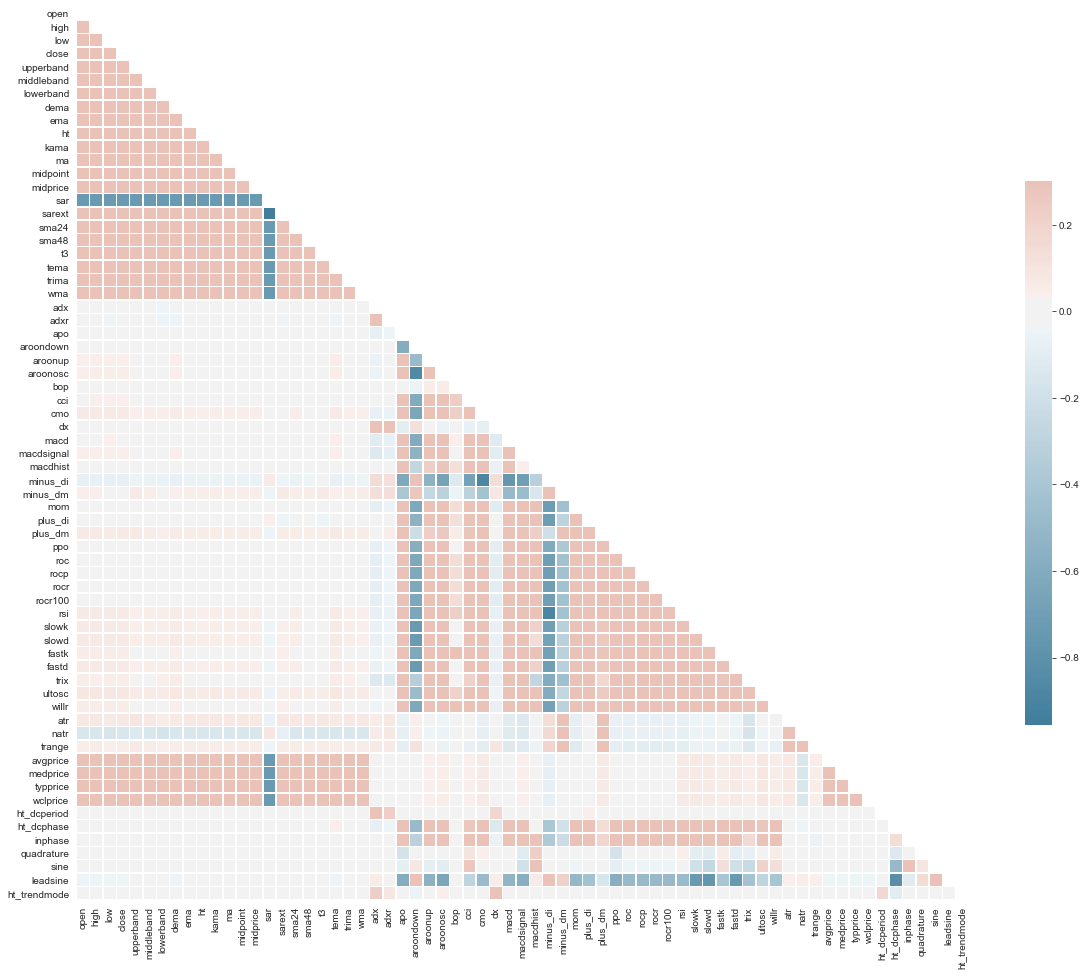

In [12]:
## correlation heatmap

sns.set_style('whitegrid')

# Compute the correlation matrix
corr = data.corr()

# Generate a mask for the upper triangle
## ref.https://seaborn.pydata.org/examples/many_pairwise_correlations.html
mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(20, 20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, 
            mask=mask, 
            cmap=cmap, 
            vmax=.3, 
            center=0,
            square=True, 
            linewidths=.5, 
            # annot=True, 
            fmt='.3f',   # ref. https://stackoverflow.com/questions/54506626/how-to-understand-seaborns-heatmap-annotation-format
            # annot_kws={'fontsize': 9 },
            cbar_kws={"shrink": .5})
plt.show()


## auto-encoder for feature selection

In [13]:
data.columns.to_list()

['datetime',
 'open',
 'high',
 'low',
 'close',
 'upperband',
 'middleband',
 'lowerband',
 'dema',
 'ema',
 'ht',
 'kama',
 'ma',
 'midpoint',
 'midprice',
 'sar',
 'sarext',
 'sma24',
 'sma48',
 't3',
 'tema',
 'trima',
 'wma',
 'adx',
 'adxr',
 'apo',
 'aroondown',
 'aroonup',
 'aroonosc',
 'bop',
 'cci',
 'cmo',
 'dx',
 'macd',
 'macdsignal',
 'macdhist',
 'minus_di',
 'minus_dm',
 'mom',
 'plus_di',
 'plus_dm',
 'ppo',
 'roc',
 'rocp',
 'rocr',
 'rocr100',
 'rsi',
 'slowk',
 'slowd',
 'fastk',
 'fastd',
 'trix',
 'ultosc',
 'willr',
 'atr',
 'natr',
 'trange',
 'avgprice',
 'medprice',
 'typprice',
 'wclprice',
 'ht_dcperiod',
 'ht_dcphase',
 'inphase',
 'quadrature',
 'sine',
 'leadsine',
 'ht_trendmode']

In [15]:
data

,datetime,open,high,low,close,upperband,middleband,lowerband,dema,ema,...,medprice,typprice,wclprice,ht_dcperiod,ht_dcphase,inphase,quadrature,sine,leadsine,ht_trendmode
0,2005-01-10 07:00:00,136.895,136.988,136.648,136.688,137.291714,136.903042,136.514369,136.658837,137.033795,...,136.8180,136.774667,136.75300,25.313117,69.607657,-0.058252,-0.015885,0.937329,0.909180,0
1,2005-01-10 08:00:00,136.678,136.978,136.678,136.938,137.137337,136.875667,136.613997,136.674119,137.026131,...,136.8280,136.864667,136.88300,25.379877,74.752035,0.017112,0.072967,0.964797,0.868181,0
2,2005-01-10 09:00:00,136.928,137.058,136.814,136.854,137.033890,136.855625,136.677360,136.675841,137.012361,...,136.9360,136.908667,136.89500,25.411079,80.090513,0.007318,-0.132354,0.985081,0.818245,0
3,2005-01-10 10:00:00,136.854,136.944,136.784,136.844,137.034372,136.856833,136.679295,136.676902,136.998892,...,136.8640,136.857333,136.85400,25.419668,86.511160,-0.061843,-0.020957,0.998147,0.748827,0
4,2005-01-10 11:00:00,136.844,136.904,136.594,136.834,137.002173,136.847208,136.692244,136.677334,136.985701,...,136.7490,136.777333,136.79150,25.413883,98.568945,-0.011868,-0.002494,0.988837,0.593855,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102934,2021-02-26 18:00:00,128.826,128.826,128.738,128.758,129.479782,129.047458,128.615135,128.952115,129.025802,...,128.7820,128.774000,128.77000,26.200642,41.693396,-0.085737,0.699195,0.665144,0.998335,1
102935,2021-02-26 19:00:00,128.762,128.822,128.676,128.782,129.437836,129.021167,128.604497,128.920562,129.006298,...,128.7490,128.760000,128.76550,26.585244,41.951631,0.190840,0.777070,0.668503,0.998585,1
102936,2021-02-26 20:00:00,128.784,128.792,128.594,128.594,129.431239,128.993500,128.555761,128.864092,128.973314,...,128.6930,128.660000,128.64350,26.246893,38.633890,0.472024,0.093731,0.624342,0.993834,1
102937,2021-02-26 21:00:00,128.598,128.680,128.563,128.655,129.402417,128.966000,128.529583,128.823937,128.947849,...,128.6215,128.632667,128.63825,25.463503,38.393336,0.272356,-0.961464,0.621057,0.993359,1


## 2. Data Processing
### 2.1 Convert to supervised frame

In [16]:
## convert to supervised data frame
data_supervised = series_to_supervised(data, 71, 25)
data_supervised

,var1(t-71),var2(t-71),var3(t-71),var4(t-71),var5(t-71),var6(t-71),var7(t-71),var8(t-71),var9(t-71),var10(t-71),...,var59(t+24),var60(t+24),var61(t+24),var62(t+24),var63(t+24),var64(t+24),var65(t+24),var66(t+24),var67(t+24),var68(t+24)
71,2005-01-10 07:00:00,136.895,136.988,136.648,136.688,137.291714,136.903042,136.514369,136.658837,137.033795,...,135.0750,135.075000,135.07500,15.900200,-25.007845,-0.043639,-0.174967,-0.422742,0.341891,1.0
72,2005-01-10 08:00:00,136.678,136.978,136.678,136.938,137.137337,136.875667,136.613997,136.674119,137.026131,...,135.1945,135.164333,135.14925,15.945558,-12.545125,-0.182692,-0.303083,-0.217208,0.536635,1.0
73,2005-01-10 09:00:00,136.928,137.058,136.814,136.854,137.033890,136.855625,136.677360,136.675841,137.012361,...,134.7740,134.657333,134.59900,16.396602,-6.866118,-0.334587,-0.074960,-0.119550,0.617501,1.0
74,2005-01-10 10:00:00,136.854,136.944,136.784,136.844,137.034372,136.856833,136.679295,136.676902,136.998892,...,134.5940,134.567333,134.55400,17.270110,-9.830047,-0.250407,0.208516,-0.170726,0.576004,1.0
75,2005-01-10 11:00:00,136.844,136.904,136.594,136.834,137.002173,136.847208,136.692244,136.677334,136.985701,...,134.6340,134.634000,134.63400,18.479999,-11.362598,-0.141509,0.172432,-0.197017,0.553935,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102910,2021-02-22 19:00:00,127.782,127.794,127.749,127.783,128.252298,127.929708,127.607119,127.869946,127.883550,...,128.7820,128.774000,128.77000,26.200642,41.693396,-0.085737,0.699195,0.665144,0.998335,1.0
102911,2021-02-22 20:00:00,127.780,127.790,127.681,127.694,128.257326,127.925792,127.594257,127.841920,127.868386,...,128.7490,128.760000,128.76550,26.585244,41.951631,0.190840,0.777070,0.668503,0.998585,1.0
102912,2021-02-22 21:00:00,127.691,127.801,127.680,127.756,128.257736,127.925375,127.593014,127.826775,127.859395,...,128.6930,128.660000,128.64350,26.246893,38.633890,0.472024,0.093731,0.624342,0.993834,1.0
102913,2021-02-22 22:00:00,127.736,127.783,127.711,127.766,128.258119,127.919792,127.581464,127.815039,127.851923,...,128.6215,128.632667,128.63825,25.463503,38.393336,0.272356,-0.961464,0.621057,0.993359,1.0


In [17]:
columns = data_supervised.columns.to_list()

In [18]:
## select columns to organise features and targets

selected_columns = []
for var in range(2, 69):  ## exclude var(datetime)
    for t in range(71, 0, -1):
        selected_columns.append('var'+str(var)+'(t-'+str(t)+')')
    selected_columns.append('var'+str(var)+'(t)')
selected_columns.append('var5(t+6)')  # 6th hour in future of var5(close)
selected_columns.append('var5(t+12)') # 11th hour in future
selected_columns.append('var5(t+24)') # 11th hour in future

selected_columns.append('var1(t)') # datetime of t

In [19]:
data_supervised = data_supervised[selected_columns]

In [20]:
data_supervised.reset_index(drop=True, inplace=True)

In [21]:
data_supervised

,var2(t-71),var2(t-70),var2(t-69),var2(t-68),var2(t-67),var2(t-66),var2(t-65),var2(t-64),var2(t-63),var2(t-62),...,var68(t-5),var68(t-4),var68(t-3),var68(t-2),var68(t-1),var68(t),var5(t+6),var5(t+12),var5(t+24),var1(t)
0,136.895,136.678,136.928,136.854,136.844,136.824,136.744,136.714,136.664,136.824,...,0.0,1.0,1.0,1.0,1.0,0,135.810,135.644,135.075,2005-01-13 06:00:00
1,136.678,136.928,136.854,136.844,136.824,136.744,136.714,136.664,136.824,136.766,...,1.0,1.0,1.0,1.0,0.0,0,135.640,135.294,135.104,2005-01-13 07:00:00
2,136.928,136.854,136.844,136.824,136.744,136.714,136.664,136.824,136.766,136.436,...,1.0,1.0,1.0,0.0,0.0,0,135.390,135.424,134.424,2005-01-13 08:00:00
3,136.854,136.844,136.824,136.744,136.714,136.664,136.824,136.766,136.436,136.276,...,1.0,1.0,0.0,0.0,0.0,0,135.160,135.388,134.514,2005-01-13 09:00:00
4,136.844,136.824,136.744,136.714,136.664,136.824,136.766,136.436,136.276,136.316,...,1.0,0.0,0.0,0.0,0.0,0,135.384,135.348,134.634,2005-01-13 10:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102839,127.782,127.780,127.691,127.736,127.772,127.736,127.727,127.793,127.784,127.784,...,1.0,1.0,1.0,1.0,1.0,1,129.166,129.028,128.758,2021-02-25 18:00:00
102840,127.780,127.691,127.736,127.772,127.736,127.727,127.793,127.784,127.784,127.818,...,1.0,1.0,1.0,1.0,1.0,1,129.114,128.729,128.782,2021-02-25 19:00:00
102841,127.691,127.736,127.772,127.736,127.727,127.793,127.784,127.784,127.818,127.846,...,1.0,1.0,1.0,1.0,1.0,1,128.980,128.940,128.594,2021-02-25 20:00:00
102842,127.736,127.772,127.736,127.727,127.793,127.784,127.784,127.818,127.846,127.901,...,1.0,1.0,1.0,1.0,1.0,0,128.976,129.118,128.655,2021-02-25 21:00:00


### 2.2 Train, validation, test split

In [143]:
## train      --- 11 years:          2005~2015
## validation ---  2 years:          2016-2017
## test       ---  3 years2months:   2018-2021Feb

import numpy as np
training_data, validation_data, test_data = np.split(data_supervised.sample(frac=1), [int(.6*len(data_supervised)), int(.8*len(data_supervised))])


# training_data = data_supervised[data_supervised['var1(t)'].dt.year <= 2015]
# validation_data = data_supervised[data_supervised['var1(t)'].dt.year.between(2016,2017)]
# test_data = data_supervised[data_supervised['var1(t)'].dt.year >= 2018 ]

In [144]:
print('Shape of training_data:   ', training_data.shape)
print('Shape of validation_data: ', validation_data.shape)
print('Shape of test_data:       ', test_data.shape)

Shape of training_data:    (61706, 4828)
Shape of validation_data:  (20569, 4828)
Shape of test_data:        (20569, 4828)


### 2.3 Feature target split

In [145]:
X_train = training_data.iloc[:,:-4]
X_val = validation_data.iloc[:,:-4]
X_test = test_data.iloc[:,:-4]

In [146]:
y6_train = training_data['var5(t+6)']
y6_val = validation_data['var5(t+6)']
y6_test = test_data['var5(t+6)']

y12_train = training_data['var5(t+12)']
y12_val = validation_data['var5(t+12)']
y12_test = test_data['var5(t+12)']


y24_train = training_data['var5(t+24)']
y24_val = validation_data['var5(t+24)']
y24_test = test_data['var5(t+24)']

### 2.4 Min-Max Scaling of X

In [147]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

### 2.5 Convert to 3D 

In [148]:
## convert to 3D
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_val = X_val.reshape((X_val.shape[0], 1, X_val.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))


## 3. LSTM model

In [149]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import keras

### 3.1 Model 1: Prediction of t+6

In [150]:
# LSTM model to predict t+6
model_6 = Sequential()
model_6.add(LSTM(500, input_shape=(X_train.shape[1], X_train.shape[2])))
model_6.add(Dense(1))
model_6.compile(optimizer='adam', loss='mse')

model_6.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_9 (LSTM)                (None, 500)               10650000  
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 501       
Total params: 10,650,501
Trainable params: 10,650,501
Non-trainable params: 0
_________________________________________________________________


In [151]:
## call back
path_checkpoint_6 = "model6_checkpoint.h5"
es_callback = keras.callbacks.EarlyStopping(monitor="val_loss", min_delta=0, patience=10)

modelckpt_callback_6 = keras.callbacks.ModelCheckpoint(
    monitor="val_loss",
    filepath=path_checkpoint_6,
    verbose=1,
    save_weights_only=True,
    save_best_only=True,
)


## trainging model
history6 = model_6.fit(X_train, 
                      y6_train, 
                      epochs=10000, 
                      batch_size=128,
                      validation_data=(X_val, y6_val), 
                      callbacks=[es_callback, modelckpt_callback_6],
                      verbose=2, 
                      shuffle=False)


Epoch 1/10000
483/483 - 35s - loss: 5083.2861 - val_loss: 873.6484

Epoch 00001: val_loss improved from inf to 873.64838, saving model to model6_checkpoint.h5
Epoch 2/10000
483/483 - 27s - loss: 385.0139 - val_loss: 257.6658

Epoch 00002: val_loss improved from 873.64838 to 257.66583, saving model to model6_checkpoint.h5
Epoch 3/10000
483/483 - 26s - loss: 236.9242 - val_loss: 205.5012

Epoch 00003: val_loss improved from 257.66583 to 205.50116, saving model to model6_checkpoint.h5
Epoch 4/10000
483/483 - 27s - loss: 174.2708 - val_loss: 137.1777

Epoch 00004: val_loss improved from 205.50116 to 137.17775, saving model to model6_checkpoint.h5
Epoch 5/10000
483/483 - 28s - loss: 107.0113 - val_loss: 72.5745

Epoch 00005: val_loss improved from 137.17775 to 72.57449, saving model to model6_checkpoint.h5
Epoch 6/10000
483/483 - 27s - loss: 47.6777 - val_loss: 27.8955

Epoch 00006: val_loss improved from 72.57449 to 27.89554, saving model to model6_checkpoint.h5
Epoch 7/10000
483/483 - 27s

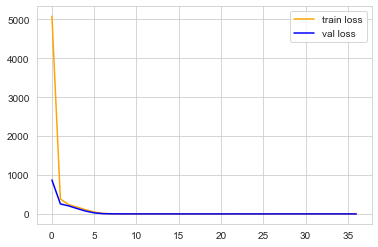

In [152]:
train_loss_6 = history6.history['loss']
val_loss_6 = history6.history['val_loss']
plt.plot(train_loss_6, label='train loss', c='orange')
plt.plot(val_loss_6, label='val loss', c='blue')
plt.legend(loc='best')
plt.show()

### 3.2 Model 2: Prediction of t+12

In [153]:
# LSTM model to predict t+12
model_12 = Sequential()
model_12.add(LSTM(500, input_shape=(X_train.shape[1], X_train.shape[2])))
model_12.add(Dense(1))
model_12.compile(optimizer='adam', loss='mse')

model_12.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_10 (LSTM)               (None, 500)               10650000  
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 501       
Total params: 10,650,501
Trainable params: 10,650,501
Non-trainable params: 0
_________________________________________________________________


In [154]:
## call back
path_checkpoint_12 = "model12_checkpoint.h5"
es_callback = keras.callbacks.EarlyStopping(monitor="val_loss", min_delta=0, patience=10)

modelckpt_callback_12 = keras.callbacks.ModelCheckpoint(
    monitor="val_loss",
    filepath=path_checkpoint_12,
    verbose=1,
    save_weights_only=True,
    save_best_only=True,
)


## trainging model
history12 = model_12.fit(X_train, 
                      y12_train, 
                      epochs=10000, 
                      batch_size=128,
                      validation_data=(X_val, y12_val), 
                      callbacks=[es_callback, modelckpt_callback_12],
                      verbose=2, 
                      shuffle=False)


Epoch 1/10000
483/483 - 37s - loss: 5128.3628 - val_loss: 870.8292

Epoch 00001: val_loss improved from inf to 870.82922, saving model to model12_checkpoint.h5
Epoch 2/10000
483/483 - 27s - loss: 383.6141 - val_loss: 257.5883

Epoch 00002: val_loss improved from 870.82922 to 257.58826, saving model to model12_checkpoint.h5
Epoch 3/10000
483/483 - 26s - loss: 242.2327 - val_loss: 223.9038

Epoch 00003: val_loss improved from 257.58826 to 223.90384, saving model to model12_checkpoint.h5
Epoch 4/10000
483/483 - 26s - loss: 189.3364 - val_loss: 151.1843

Epoch 00004: val_loss improved from 223.90384 to 151.18427, saving model to model12_checkpoint.h5
Epoch 5/10000
483/483 - 26s - loss: 116.7060 - val_loss: 84.6237

Epoch 00005: val_loss improved from 151.18427 to 84.62371, saving model to model12_checkpoint.h5
Epoch 6/10000
483/483 - 28s - loss: 54.6209 - val_loss: 31.6116

Epoch 00006: val_loss improved from 84.62371 to 31.61161, saving model to model12_checkpoint.h5
Epoch 7/10000
483/483

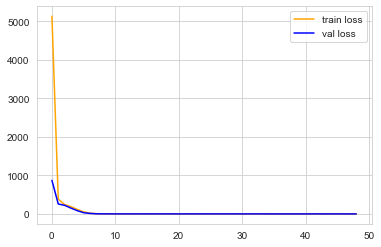

In [155]:
train_loss_12 = history12.history['loss']
val_loss_12 = history12.history['val_loss']
plt.plot(train_loss_12, label='train loss', c='orange')
plt.plot(val_loss_12, label='val loss', c='blue')
plt.legend(loc='best')
plt.show()

### 3.3 Model 3: Prediction of t+24


In [156]:
# LSTM model to predict t+24
model_24 = Sequential()
model_24.add(LSTM(500, input_shape=(X_train.shape[1], X_train.shape[2])))
model_24.add(Dense(1))
model_24.compile(optimizer='adam', loss='mse')

model_24.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_11 (LSTM)               (None, 500)               10650000  
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 501       
Total params: 10,650,501
Trainable params: 10,650,501
Non-trainable params: 0
_________________________________________________________________


In [157]:
## call back
path_checkpoint_24 = "model24_checkpoint.h5"
es_callback = keras.callbacks.EarlyStopping(monitor="val_loss", min_delta=0, patience=10)

modelckpt_callback_24 = keras.callbacks.ModelCheckpoint(
    monitor="val_loss",
    filepath=path_checkpoint_24,
    verbose=1,
    save_weights_only=True,
    save_best_only=True,
)


## trainging model
history24 = model_24.fit(X_train, 
                      y24_train, 
                      epochs=10000, 
                      batch_size=128,
                      validation_data=(X_val, y24_val), 
                      callbacks=[es_callback, modelckpt_callback_24],
                      verbose=2, 
                      shuffle=False)


Epoch 1/10000
483/483 - 40s - loss: 5067.3228 - val_loss: 840.4156

Epoch 00001: val_loss improved from inf to 840.41559, saving model to model24_checkpoint.h5
Epoch 2/10000
483/483 - 28s - loss: 374.9503 - val_loss: 257.2449

Epoch 00002: val_loss improved from 840.41559 to 257.24493, saving model to model24_checkpoint.h5
Epoch 3/10000
483/483 - 26s - loss: 239.5247 - val_loss: 217.7542

Epoch 00003: val_loss improved from 257.24493 to 217.75415, saving model to model24_checkpoint.h5
Epoch 4/10000
483/483 - 27s - loss: 186.9204 - val_loss: 153.9895

Epoch 00004: val_loss improved from 217.75415 to 153.98952, saving model to model24_checkpoint.h5
Epoch 5/10000
483/483 - 27s - loss: 120.6880 - val_loss: 82.3089

Epoch 00005: val_loss improved from 153.98952 to 82.30891, saving model to model24_checkpoint.h5
Epoch 6/10000
483/483 - 27s - loss: 56.6818 - val_loss: 36.4140

Epoch 00006: val_loss improved from 82.30891 to 36.41398, saving model to model24_checkpoint.h5
Epoch 7/10000
483/483

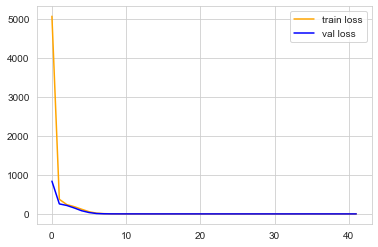

In [158]:
train_loss_24 = history24.history['loss']
val_loss_24 = history24.history['val_loss']
plt.plot(train_loss_24, label='train loss', c='orange')
plt.plot(val_loss_24, label='val loss', c='blue')
plt.legend(loc='best')
plt.show()

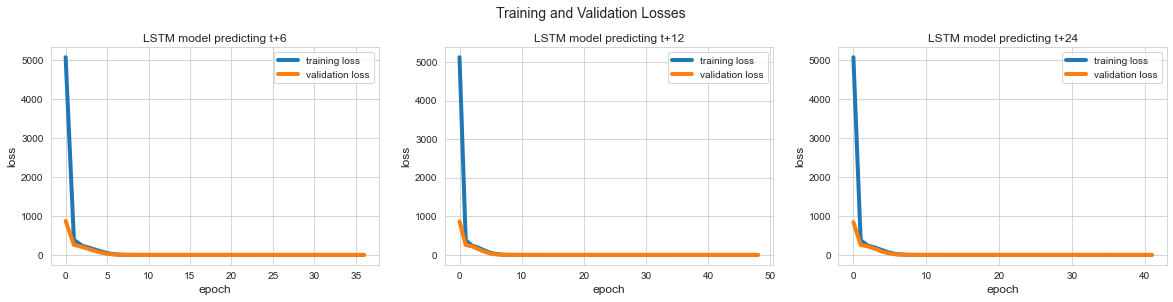

In [171]:
fig, ax = plt.subplots(1, 3, figsize=(20,4))
fig.suptitle('Training and Validation Losses', size=14, y=1.02)

## model 1
epochs_6 = len(train_loss_6)
x_6 = [epoch for epoch in range(epochs_6) if epoch>=0]
y_train_loss_6 = train_loss_6[0:]
y_val_loss_6 = val_loss_6[0:]
sns.lineplot(ax=ax[0], x=x_6, y=y_train_loss_6, label='training loss', linewidth=4)
sns.lineplot(ax=ax[0], x=x_6, y=y_val_loss_6, label='validation loss', linewidth=4)
ax[0].set_title('LSTM model predicting t+6', size=12)
ax[0].set_ylabel('loss', size=12)
ax[0].set_xlabel('epoch', size=12)
ax[0].legend(loc="upper right")


## model 2
epochs_12 = len(train_loss_12)
x_12 = [epoch for epoch in range(epochs_12) if epoch>=0]
y_train_loss_12 = train_loss_12[0:]
y_val_loss_12 = val_loss_12[0:]

sns.lineplot(ax=ax[1], x=x_12, y=y_train_loss_12, label='training loss', linewidth=4)
sns.lineplot(ax=ax[1], x=x_12, y=y_val_loss_12, label='validation loss', linewidth=4)
ax[1].set_title('LSTM model predicting t+12', size=12)
ax[1].set_ylabel('loss', size=12)
ax[1].set_xlabel('epoch', size=12)
ax[1].legend(loc="upper right")


## model 3
epochs_24 = len(train_loss_24)
x_24 = [epoch for epoch in range(epochs_24) if epoch>=0]
y_train_loss_24 = train_loss_24[0:]
y_val_loss_24 = val_loss_24[0:]

sns.lineplot(ax=ax[2], x=x_24, y=y_train_loss_24, label='training loss', linewidth=4)
sns.lineplot(ax=ax[2], x=x_24, y=y_val_loss_24, label='validation loss', linewidth=4)
ax[2].set_title('LSTM model predicting t+24', size=12)
ax[2].set_ylabel('loss', size=12)
ax[2].set_xlabel('epoch', size=12)
ax[2].legend(loc="upper right")

plt.show()

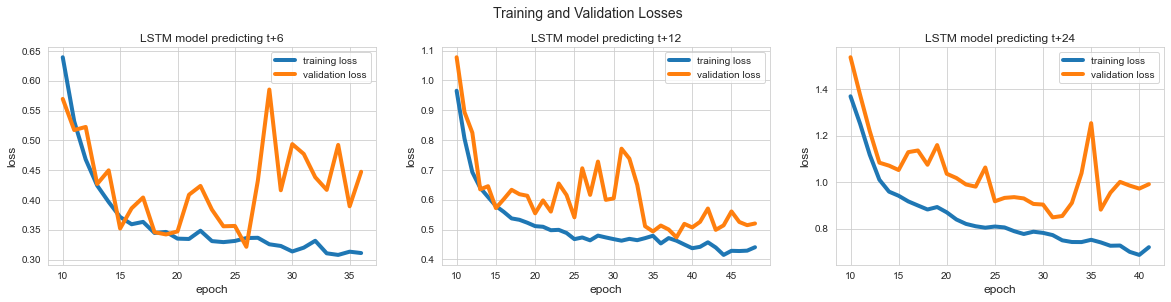

In [170]:
fig, ax = plt.subplots(1, 3, figsize=(20,4))
fig.suptitle('Training and Validation Losses', size=14, y=1.02)

## model 1
epochs_6 = len(train_loss_6)
x_6 = [epoch for epoch in range(epochs_6) if epoch>=10]
y_train_loss_6 = train_loss_6[10:]
y_val_loss_6 = val_loss_6[10:]
sns.lineplot(ax=ax[0], x=x_6, y=y_train_loss_6, label='training loss', linewidth=4)
sns.lineplot(ax=ax[0], x=x_6, y=y_val_loss_6, label='validation loss', linewidth=4)
ax[0].set_title('LSTM model predicting t+6', size=12)
ax[0].set_ylabel('loss', size=12)
ax[0].set_xlabel('epoch', size=12)
ax[0].legend(loc="upper right")


## model 2
epochs_12 = len(train_loss_12)
x_12 = [epoch for epoch in range(epochs_12) if epoch>=10]
y_train_loss_12 = train_loss_12[10:]
y_val_loss_12 = val_loss_12[10:]

sns.lineplot(ax=ax[1], x=x_12, y=y_train_loss_12, label='training loss', linewidth=4)
sns.lineplot(ax=ax[1], x=x_12, y=y_val_loss_12, label='validation loss', linewidth=4)
ax[1].set_title('LSTM model predicting t+12', size=12)
ax[1].set_ylabel('loss', size=12)
ax[1].set_xlabel('epoch', size=12)
ax[1].legend(loc="upper right")


## model 3
epochs_24 = len(train_loss_24)
x_24 = [epoch for epoch in range(epochs_24) if epoch>=10]
y_train_loss_24 = train_loss_24[10:]
y_val_loss_24 = val_loss_24[10:]

sns.lineplot(ax=ax[2], x=x_24, y=y_train_loss_24, label='training loss', linewidth=4)
sns.lineplot(ax=ax[2], x=x_24, y=y_val_loss_24, label='validation loss', linewidth=4)
ax[2].set_title('LSTM model predicting t+24', size=12)
ax[2].set_ylabel('loss', size=12)
ax[2].set_xlabel('epoch', size=12)
ax[2].legend(loc="upper right")

plt.show()

## 4. Prediction on test data

### 4.1 Prediction on test data

In [159]:
## predict the 6th hour ahead (t+6)
test_predict_6 = model_6.predict(X_test)

## predict the 12th hour ahead (t+12)
test_predict_12 = model_12.predict(X_test)

## predict the 24th hour ahead (t+24)
test_predict_24 = model_24.predict(X_test)


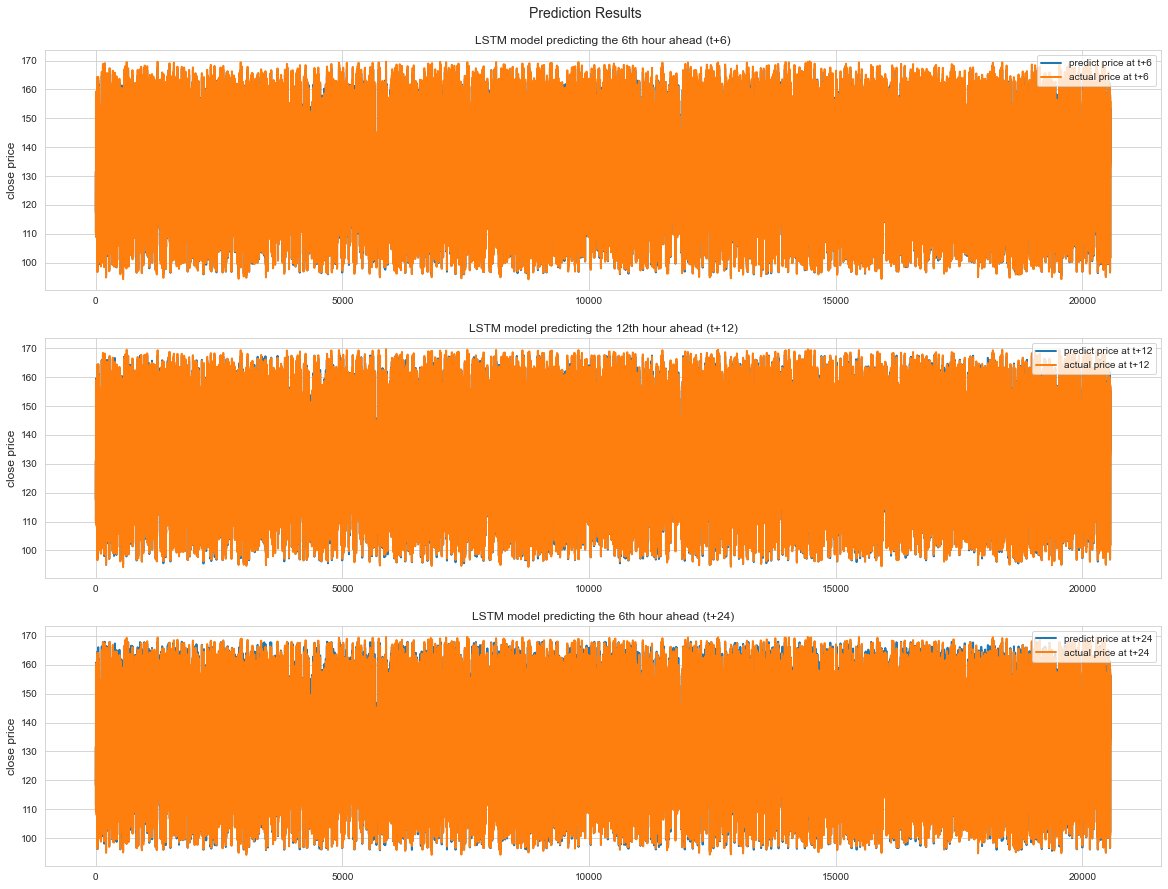

In [166]:
# prediction plots

fig, ax = plt.subplots(3, 1, figsize=(20,15))
fig.suptitle('Prediction Results', size=14, y=0.92)

# x=test_data['var1(t)']
x = [x for x in range(0, len(test_predict_6))]

ax[0].plot(x, test_predict_6, label='predict price at t+6', linewidth=2)
ax[0].plot(x, y6_test, label='actual price at t+6', linewidth=2)
ax[0].set_title('LSTM model predicting the 6th hour ahead (t+6)', size=12)
ax[0].set_ylabel('close price', size=12)
ax[0].set_xlabel(None)
ax[0].legend(loc="upper right")


ax[1].plot(x, test_predict_12, label='predict price at t+12', linewidth=2)
ax[1].plot(x, y12_test, label='actual price at t+12', linewidth=2)
ax[1].set_title('LSTM model predicting the 12th hour ahead (t+12)', size=12)
ax[1].set_ylabel('close price', size=12)
ax[1].set_xlabel(None)
ax[1].legend(loc="upper right")

ax[2].plot(x, test_predict_24, label='predict price at t+24', linewidth=2)
ax[2].plot(x, y24_test, label='actual price at t+24', linewidth=2)
ax[2].set_title('LSTM model predicting the 6th hour ahead (t+24)', size=12)
ax[2].set_ylabel('close price', size=12)
ax[2].set_xlabel(None)
ax[2].legend(loc="upper right")

plt.show()

### 4.2 Evaluation of prediction performance

In [172]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

## t+6
print('t+6 prediction result evaluation')
print('RMSE: ', mean_squared_error(y6_test, test_predict_6, squared=False))
print('MAPE: ', mean_absolute_percentage_error(y6_test, test_predict_6))
print('MAE:  ', mean_absolute_error(y6_test, test_predict_6))

t+6 prediction result evaluation
RMSE:  0.6673084167885092
MAPE:  0.003749998576289612
MAE:   0.4962510583393424


In [173]:
## t+12
print('t+12 prediction result evaluation')
print('RMSE: ', mean_squared_error(y12_test, test_predict_12, squared=False))
print('MAPE: ', mean_absolute_percentage_error(y12_test, test_predict_12))
print('MAE:  ', mean_absolute_error(y12_test, test_predict_12))

t+12 prediction result evaluation
RMSE:  0.7160265765343362
MAPE:  0.004291960285228475
MAE:   0.5560978924381615


In [174]:
## t+24
print('t+24 prediction result evaluation')
print('RMSE: ', mean_squared_error(y24_test, test_predict_24, squared=False))
print('MAPE: ', mean_absolute_percentage_error(y24_test, test_predict_24))
print('MAE:  ', mean_absolute_error(y24_test, test_predict_24))

t+24 prediction result evaluation
RMSE:  0.997897249643794
MAPE:  0.005663302562468843
MAE:   0.7400934015782482
